In [103]:
import sys
sys.path.append('..')

import optimus

frequency = 500e3 #Hz = 
a = 0.003 #3cm
D = 0.18 #18 cm
centroid_file='Data/default_random_array_centroid_locations.dat'
source = optimus.source.create_array(frequency, element_radius=a, centroid_locations_filename=centroid_file,
                                     location=[-D, 0, 0], number_of_point_sources_per_wavelength=2, velocity=0.4)

In [104]:
sphere_radius = 7.5e-3
geometry = optimus.geometry.shapes.Sphere(radius=7.5e-3, element_size=0.75e-3)
material_ext = optimus.material.load_material('water')
material_int = optimus.material.load_material('bone (cortical)')

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d

x = source.centroid_locations[0, :]
y = source.centroid_locations[1, :]
z = source.centroid_locations[2, :]

In [176]:
import numpy as np
Nx = 201
Ny = 101
Nz = 101
# Zmax = 0.05 Nz=101 quizas menos
xmin, xmax, ymin, ymax, zmin, zmax = [-D, D, -0.05, 0.05, -0.05, 0.05]

In [188]:
%%time

from optimus.source.transducers import transducer_field

paso = zmax / 50
save_p = []

for i in range(Nz):
    zval = (50 - i) * paso #PROBAR distintos valores loop (bajar valores de Nx Ny)
    plot_grid = np.mgrid[xmin:xmax:Nx * 1j, ymin:ymax:Ny * 1j]
    points = np.vstack((plot_grid[0].ravel(),
                        plot_grid[1].ravel(),
                        zval*np.ones(plot_grid[0].size)))
    
    inc_field = transducer_field(source, material_ext, points, verbose=True)
    incident_pressure = inc_field.pressure.reshape([Nx, Ny])
    
    incident_pressure_plot = optimus.postprocess.common.array_to_imshow(incident_pressure)
    save_p.append(incident_pressure_plot)
    
    print(i)

Number of point sources across element diameter: 5
Number of point sources in transducer: 3328
Parallelisation library is: numba
0
Number of point sources across element diameter: 5
Number of point sources in transducer: 3328
Parallelisation library is: numba
1
Number of point sources across element diameter: 5
Number of point sources in transducer: 3328
Parallelisation library is: numba
2
Number of point sources across element diameter: 5
Number of point sources in transducer: 3328
Parallelisation library is: numba
3
Number of point sources across element diameter: 5
Number of point sources in transducer: 3328
Parallelisation library is: numba
4
Number of point sources across element diameter: 5
Number of point sources in transducer: 3328
Parallelisation library is: numba
5
Number of point sources across element diameter: 5
Number of point sources in transducer: 3328
Parallelisation library is: numba
6
Number of point sources across element diameter: 5
Number of point sources in trans

62
Number of point sources across element diameter: 5
Number of point sources in transducer: 3328
Parallelisation library is: numba
63
Number of point sources across element diameter: 5
Number of point sources in transducer: 3328
Parallelisation library is: numba
64
Number of point sources across element diameter: 5
Number of point sources in transducer: 3328
Parallelisation library is: numba
65
Number of point sources across element diameter: 5
Number of point sources in transducer: 3328
Parallelisation library is: numba
66
Number of point sources across element diameter: 5
Number of point sources in transducer: 3328
Parallelisation library is: numba
67
Number of point sources across element diameter: 5
Number of point sources in transducer: 3328
Parallelisation library is: numba
68
Number of point sources across element diameter: 5
Number of point sources in transducer: 3328
Parallelisation library is: numba
69
Number of point sources across element diameter: 5
Number of point source

In [ ]:
zval = 0.0 #PROBAR distintos valores loop (bajar valores de Nx Ny)
plot_grid = np.mgrid[xmin:xmax:Nx * 1j, ymin:ymax:Ny * 1j]
points = np.vstack((plot_grid[0].ravel(),
                    plot_grid[1].ravel(),
                    zval*np.ones(plot_grid[0].size)))

In [177]:
%%time
from optimus.source.transducers import transducer_field
inc_field = transducer_field(source, material_ext, points, verbose=True)
incident_pressure = inc_field.pressure.reshape([Nx, Ny])

Number of point sources across element diameter: 5
Number of point sources in transducer: 3328
Parallelisation library is: numba
CPU times: user 8min 23s, sys: 0 ns, total: 8min 23s
Wall time: 1min 3s


In [196]:
save_p_2 = [np.abs(i) for i in save_p]

In [197]:
arr = np.array(save_p_2)

In [198]:
arr_reshaped = arr.reshape(arr.shape[0], -1)

In [199]:
np.savetxt('IPP_abs.txt', arr_reshaped)

In [200]:
(arr.shape[2], arr.shape[2])

(201, 201)

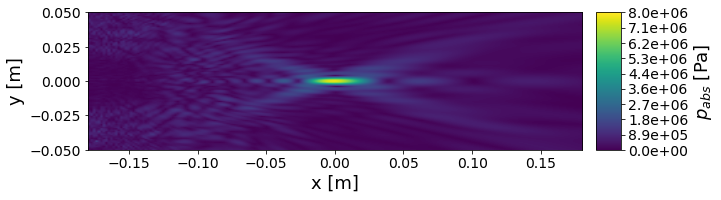

In [178]:
%matplotlib inline
from optimus.postprocess.plot import surface_plot

incident_pressure_plot = optimus.postprocess.common.array_to_imshow(incident_pressure)

theta = np.linspace(0, 2*np.pi, 100)
edge_sphere = (geometry.origin[0] + geometry.radius * np.cos(theta),
               geometry.origin[1] + geometry.radius * np.sin(theta))

fig = surface_plot(np.abs(incident_pressure_plot),
                   axes_lims=(xmin, xmax, ymin, ymax),
                   axes_labels=("x [m]", "y [m]"),
                   colormap='viridis',
                   colormap_lims=[0,8e6],
                   colorbar_unit="$p_{abs}$ [Pa]",
                   )

In [124]:
np.max(np.abs(incident_pressure_plot))

8009622.074876204

In [148]:
c_0 = material_ext.speed_of_sound
rho_0 = material_ext.density
C_t = material_ext.heat_capacity
k_t = material_ext.thermal_conductivity
eta = material_ext.attenuation_pow_b #attenuation_pow_b
P = incident_pressure_plot.copy()
#alpha_0 = material_ext.attenuation_coeff_a # Np/m
alpha_0 = material_ext.attenuation_coeff_a * 8.69 # dB/m

In [163]:
c_0 #bien

1482.3

In [164]:
rho_0 #bien

994.035466

In [166]:
C_t

4178.0

Intensidad hasta 5000 W/cm$^2$ = 50000000 W/m$^2$

In [147]:
np.max(I) #orden correcta en w/m^2

43539763.06228176

In [152]:
%%time
I = (np.abs(P))**2 / (c_0 * rho_0)
alpha = alpha_0 * frequency / 1000000
Q = I.copy()
Q = 2 * alpha * I

CPU times: user 7.9 ms, sys: 2.03 ms, total: 9.93 ms
Wall time: 5.35 ms


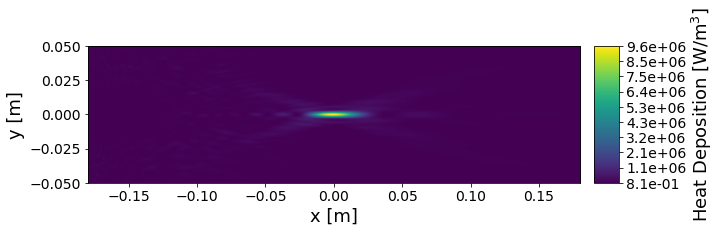

In [153]:
# PLOT Q
fig = surface_plot(np.abs(Q),
                   axes_lims=(xmin, xmax, ymin, ymax),
                   axes_labels=("x [m]", "y [m]"),
                   colormap='viridis',
                   colormap_lims=[np.min(Q),np.max(Q)],
                   colorbar_unit="Heat Deposition [W/m$^3$]",
                   )

In [154]:
np.max(Q)

9583280.756630566

NO CORRER:

In [56]:
num_x = Q.shape[1]
num_y = Q.shape[0]

delta_x = (xmax - xmin) / num_x
delta_y = (ymax - ymin) / num_x
delta_t = 0.1

t_0 = 37

T_0 = np.zeros_like(Q) + t_0

aux = T_0.copy()

In [143]:
temps = [T_0]

def paso(T, Q, x, y):
    return T[y, x] + k_t * delta_t * ((T[y, x-1] - 2 * T[y, x] + T[y, x+1]) / (delta_x ** 2) + (T[y-1, x] - 2 * T[y, x] + T[y+1, x]) / (delta_y ** 2)) / (rho_0 * C_t) + Q[y, x] * delta_y / (rho_0 * C_t)

In [30]:
T_1 = np.zeros_like(Q) + t_0
#T_1 = np.pad(T_0, (1, 2), 'constant', constant_values = t_0)

for y in range(1, len(Q) - 1):
    for x in range(1, len(Q[0]) - 1):
        T_1[y, x] = paso(T_0, Q, x, y)


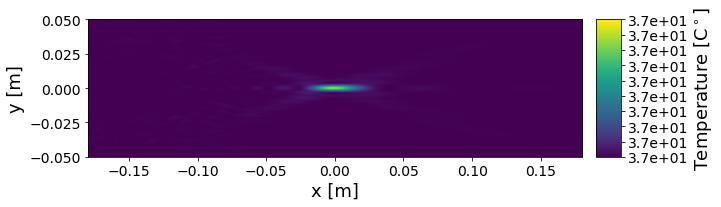

In [35]:
fig = surface_plot(np.abs(T_1),
                   axes_lims=(xmin, xmax, ymin, ymax),
                   axes_labels=("x [m]", "y [m]"),
                   colormap='viridis',
                   colormap_lims=[37, 37.00015],
                   colorbar_unit="Temperature [C$^\circ$]",
                   )

VOLVER A CORRER:

In [155]:
from numba import njit

In [96]:
def next_it(temps_list, Q):
    T_next = np.zeros_like(Q) + t_0
    
    for y in range(1, len(Q) - 1):
        for x in range(1, len(Q[0]) - 1):
            T_next[y, x] = paso(temps_list[-1], Q, x, y)
            
    temps_list.append(T_next)

ABAJO FALTA ARREGLAR LAS T Y Q

In [156]:
@njit
def next_it_numba(T, Q, t_init = 37.0):
    T_next = np.zeros_like(Q) + t_init
    
    def paso_numba(T, Q, x, y):
        return T[y, x] + k_t * delta_t * ((T[y, x-1] - 2 * T[y, x] + T[y, x+1]) / (delta_x ** 2) + (T[y-1, x] - 2 * T[y, x] + T[y+1, x]) / (delta_y ** 2)) / (rho_0 * C_t) + Q[y, x] * delta_y / (rho_0 * C_t)
    
    for y in range(1, len(Q) - 1):
        for x in range(1, len(Q[0]) - 1):
            T_next[y, x] = paso_numba(T, Q, x, y)
            
    return T_next

In [160]:
%%time
for i in range(10):
    T_0 = next_it_numba(T_0, Q)

CPU times: user 47.1 ms, sys: 0 ns, total: 47.1 ms
Wall time: 40.3 ms


In [162]:
np.max(T_0)

37.01036910425894

In [159]:
%%time
for i in range(50):
    next_it(temps, Q)

CPU times: user 25.3 s, sys: 0 ns, total: 25.3 s
Wall time: 25.3 s


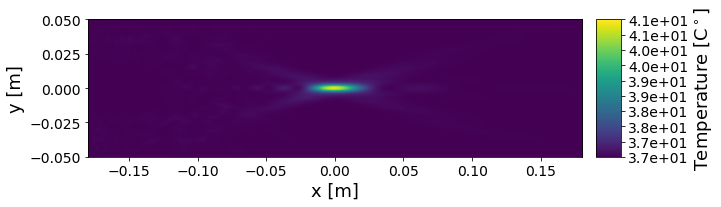

In [146]:
fig = surface_plot(np.abs(temps[-1]),
                   axes_lims=(xmin, xmax, ymin, ymax),
                   axes_labels=("x [m]", "y [m]"),
                   colormap='viridis',
                   colormap_lims=[37, np.max(temps)],
                   colorbar_unit="Temperature [C$^\circ$]",
                   )

In [145]:
np.max(temps)

41.48621194543117

In [99]:
%%time

temps_2 = [T_0]
Q_2 = np.zeros_like(Q)
for i in range(2):
    next_it(temps_2, Q_2)

Q_2 = Q.copy()
for i in range(10):
    next_it(temps_2, Q_2)
    
Q_2 = np.zeros_like(Q)
for i in range(18):
    next_it(temps_2, Q_2)

CPU times: user 15.3 s, sys: 0 ns, total: 15.3 s
Wall time: 15.3 s


In [100]:
%%time
Q_2 = np.zeros_like(Q)
for i in range(50):
    next_it(temps_2, Q_2)

CPU times: user 25.4 s, sys: 0 ns, total: 25.4 s
Wall time: 25.5 s


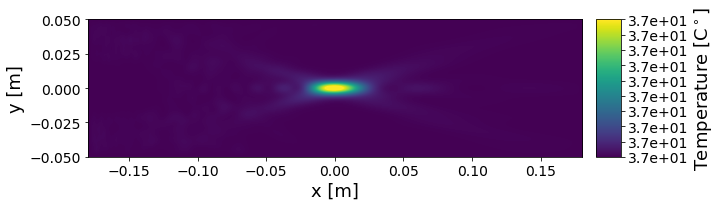

In [111]:
fig = surface_plot(np.abs(temps_2[-1]),
                   axes_lims=(xmin, xmax, ymin, ymax),
                   axes_labels=("x [m]", "y [m]"),
                   colormap='viridis',
                   colormap_lims=[37, 37.0005],
                   colorbar_unit="Temperature [C$^\circ$]",
                   )

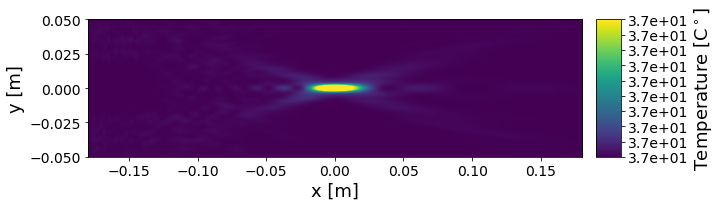

In [112]:
fig = surface_plot(np.abs(temps_2[22]),
                   axes_lims=(xmin, xmax, ymin, ymax),
                   axes_labels=("x [m]", "y [m]"),
                   colormap='viridis',
                   colormap_lims=[37, 37.0005],
                   colorbar_unit="Temperature [C$^\circ$]",
                   )

In [108]:
np.max(temps_2)

37.00119322258445

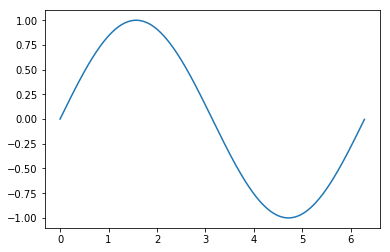

In [83]:

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i / 50))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=50)

plt.show()

In [85]:
from IPython.display import HTML
HTML(ani.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available

numba
Revisar tiempos pulsos (tiempo apagar/ prender Q)